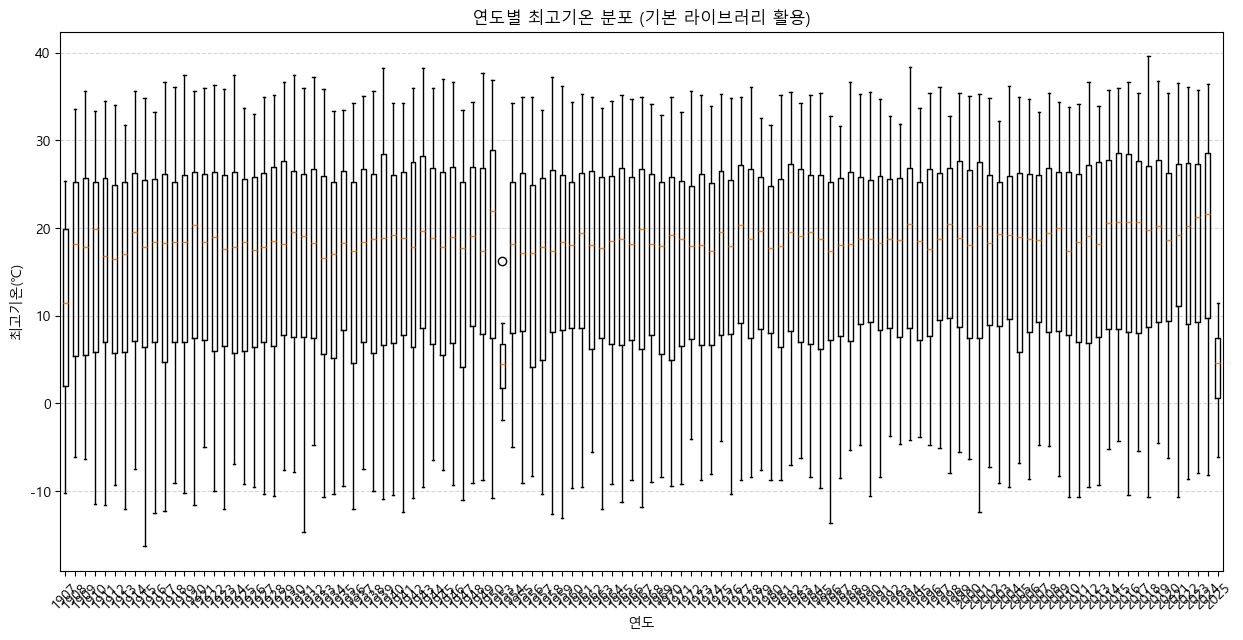

In [3]:
import csv
import matplotlib.pyplot as plt

# 1. 데이터 읽기 및 전처리
years = []
temp_data = {}

with open('data/seouldata2.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)  # 헤더(첫 줄) 건너뛰기
    
    for row in reader:
        try:
            # 날짜에서 연도 추출 (예: " 1907-10-01" -> "1907")
            date_str = row[0].strip()
            year = date_str.split('-')[0]
            
            # 최고기온 데이터 추출 (마지막 컬럼)
            max_temp = float(row[4])
            
            # 연도별로 리스트에 온도 저장
            if year not in temp_data:
                temp_data[year] = []
            temp_data[year].append(max_temp)
        except (ValueError, IndexError):
            # 데이터가 비어있거나 잘못된 경우 건너뜀
            continue

# 2. 그래프를 그리기 위해 데이터 정렬
sorted_years = sorted(temp_data.keys())
plot_data = [temp_data[year] for year in sorted_years]

# 3. 시각화 (matplotlib 기본 기능 사용)
plt.figure(figsize=(15, 7))

# 한글 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 박스 플롯 그리기
plt.boxplot(plot_data, tick_labels=sorted_years)

plt.title('연도별 최고기온 분포 (기본 라이브러리 활용)')
plt.xlabel('연도')
plt.ylabel('최고기온(℃)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()        